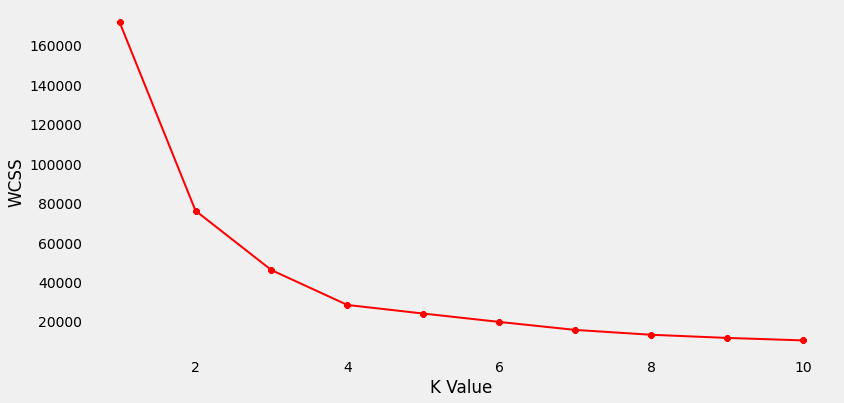

[0 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 0 0 3 1 0 1 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3
 1 3 1 2 1 2 0 3 0 2 0 0 0 2 0 0 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 2 2
 2 0 2 0 0 2 2 0 2 2 0 2 2 0 0 2 2 0 2 0 0 0 2 0 2 0 0 2 2 0 2 0 2 2 2 2 2
 0 0 0 0 0 2 2 2 2 0 0 0 1 0 1 2 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 2 1
 3 1 3 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3 1 3 1 3 1 0
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


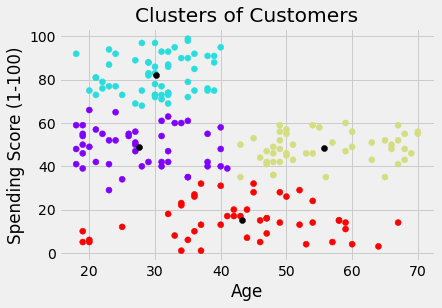

Silhouetter Score: 0.500


In [12]:
#kmeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("Mall_Customers.csv")
df.head()
X1=df.loc[:,["Age","Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()
kmeans=KMeans(n_clusters=4)
label=kmeans.fit_predict(X1)
print(label)
plt.scatter(X1[:,0],X1[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()
score=sklearn.metrics.silhouette_score(X1,kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

# New Section

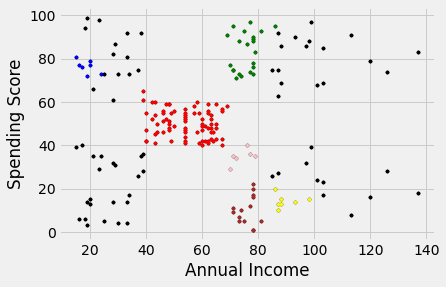

Silhouetter Score: 0.167


In [11]:
# DBSCAN Clustering
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')
data = dataset.iloc[:, [3, 4]].values
dataset.head()
# visualizing the dataset
plt.scatter(data[:, 0], data[:, 1], s = 10, c = 'black')

# Fitting DBSCAN to the dataset and predict the Cluster label
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=5.5, min_samples=4)
labels = dbscan.fit_predict(data) 
np.unique(labels)


# Visualising the clusters
plt.scatter(data[labels == -1, 0], data[labels == -1, 1], s = 10, c = 'black')
plt.scatter(data[labels == 0, 0], data[labels == 0, 1], s = 10, c = 'blue')
plt.scatter(data[labels == 1, 0], data[labels == 1, 1], s = 10, c = 'red')
plt.scatter(data[labels == 2, 0], data[labels == 2, 1], s = 10, c = 'green')
plt.scatter(data[labels == 3, 0], data[labels == 3, 1], s = 10, c = 'brown')
plt.scatter(data[labels == 4, 0], data[labels == 4, 1], s = 10, c = 'pink')
plt.scatter(data[labels == 5, 0], data[labels == 5, 1], s = 10, c = 'yellow')      
plt.scatter(data[labels == 6, 0], data[labels == 6, 1], s = 10, c = 'silver')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()
score=sklearn.metrics.silhouette_score(data,dbscan.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

(200, 2)


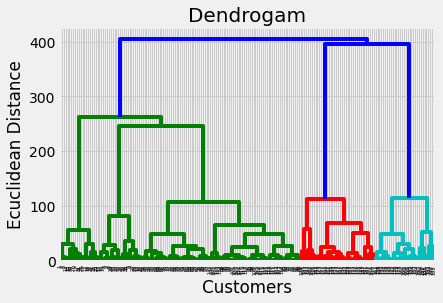

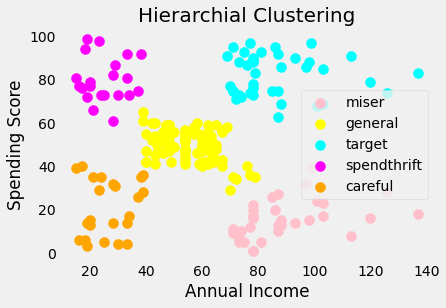

Silhouetter Score: 0.553


In [8]:
#hierachy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
data = pd.read_csv(r"Mall_Customers.csv")
x = data['Annual Income (k$)']
y = data['Age']
z = data['Spending Score (1-100)']
x = data.iloc[:, [3, 4]].values

# let's check the shape of x
print(x.shape)
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'orange', label = 'careful')
#plt.scatter(hc.cluster_centers_[:,0], hc.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()
score=sklearn.metrics.silhouette_score(x,hc.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)